In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from scheduler import CyclicCosineDecayLR

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# fake net
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()
        self.fc = nn.Linear(10,5)
    def forward(self, x):
        return self.fc(x)

#### Single parameter group example with geometric cycle increasement

In [3]:
model1 = TestNet()
optimizer1 = optim.SGD(model1.parameters(), lr=1e-2)

# scheduler with geometric cycle increasement
scheduler_geo = CyclicCosineDecayLR(optimizer1,
                                    init_interval=10,
                                    min_lr=1e-3,
                                    restart_multiplier=1.5)
epochs = list(range(200))

lr_geo = []
for epoch in epochs:
    # 1. train_model(...)
    # 2. evaluate_model(...)
    lr_geo.append(optimizer1.param_groups[0]["lr"])
    # 3. update scheduler
    scheduler_geo.step()

/home/xubuntu/tf13/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:82: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


#### Single parameter group example with fixed cycles and custom **restart_lr**

In [4]:
model2 = TestNet()
optimizer_fix = optim.SGD(model2.parameters(), lr=1e-2)

# scheduler with fixed restart cycles and custom restart learning rate
scheduler_fix = CyclicCosineDecayLR(optimizer_fix,
                                    init_interval=10,
                                    min_lr=1e-3,
                                    restart_interval=30,
                                    restart_lr=6e-3)
lr_fix = []
for epoch in epochs:
    # 1. train_model(...)
    # 2. evaluate_model(...)
    lr_fix.append(optimizer_fix.param_groups[0]["lr"])
    # 3. update scheduler
    scheduler_fix.step()

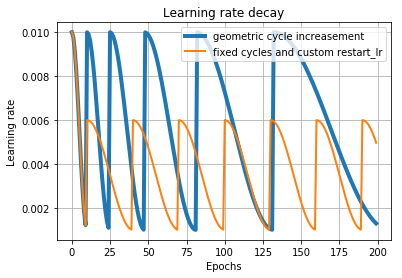

In [5]:
lines = plt.plot(epochs, lr_geo, epochs, lr_fix)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)

plt.legend(('geometric cycle increasement', 'fixed cycles and custom restart_lr'),
           loc='upper right')
plt.title('Learning rate decay')
plt.xlabel('Epochs')
plt.ylabel('Learning rate')
plt.grid(True)
plt.show()

#### Multiple parameter groups (and custom **restart_lr**)

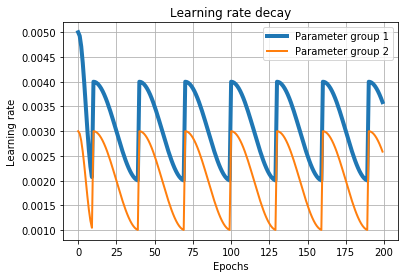

In [6]:
# Multiple parameter groups
# First group receives default initial learning rate 5e-3
# second group has custom initial learning rate 3e-3
optimizer_mul = optim.SGD([
    {'params': model1.parameters()},
    {'params': model2.parameters(), 'lr': 0.003}
],
    lr=0.005)

# scheduler with fixed cycles and custom restart learning rate
scheduler_mul = CyclicCosineDecayLR(optimizer_mul,
                                    init_interval=10,
                                    min_lr=[0.002, 0.001],
                                    restart_interval=30,
                                    restart_lr=[0.004, 0.003])
lr_mul_1 = []
lr_mul_2 = []
for epoch in epochs:
    # 1. train_model(...)
    # 2. evaluate_model(...)
    lr_mul_1.append(optimizer_mul.param_groups[0]["lr"])
    lr_mul_2.append(optimizer_mul.param_groups[1]["lr"])
    # 3. update scheduler
    scheduler_mul.step()

lines = plt.plot(epochs, lr_mul_1, epochs, lr_mul_2)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)

plt.legend(('Parameter group 1', 'Parameter group 2'),
           loc='upper right')
plt.title('Learning rate decay')
plt.xlabel('Epochs')
plt.ylabel('Learning rate')
plt.grid(True)
plt.show()